In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


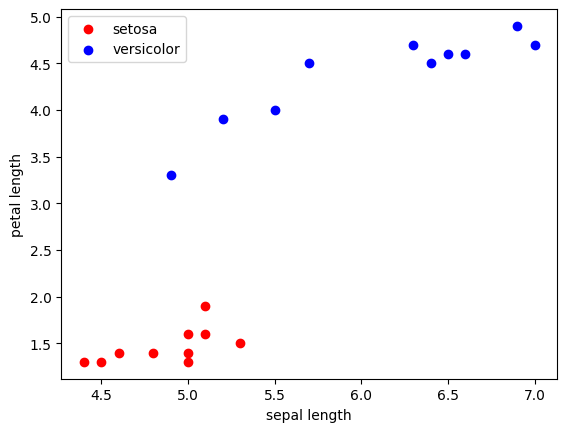

In [2]:
df = pd.read_csv("./data.txt",sep=' ', header='infer', names=['x1','x2','x3','x4','label'])
df['label'] = pd.factorize(df.label)[0]

X = df.iloc[:, 0:4]
Y = df.iloc[:, 4]


Y = np.asarray(Y)
X = np.asarray(X)
print(Y)
is_setosa = Y == 0
X_setosa = X[is_setosa]
Y_setosa = Y[is_setosa]
X_versicolor = X[~is_setosa]
Y_versicolor = Y[~is_setosa]

plt.scatter(X_setosa[:, 0], X_setosa[:, 2], 
            color='red',marker='o', label='setosa')
plt.scatter(X_versicolor[:,0], X_versicolor[:,2], 
            color='blue',marker='o', label='versicolor')
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc='upper left')
plt.show()



In [3]:
X_setosa_train = X_setosa[:8, :]
Y_setosa_train = Y_setosa[:8]
X_versicolor_train = X_versicolor[:8, :]
Y_versicolor_train = Y_versicolor[:8]
X_train = np.vstack([X_setosa_train, X_versicolor_train])
Y_train = np.hstack([Y_setosa_train, Y_versicolor_train])

X_setosa_test = X_setosa[8:, :]
Y_setosa_test = Y_setosa[8:]
X_versicolor_test = X_versicolor[8:, :]
Y_versicolor_test = Y_versicolor[8:]
X_test = np.vstack([X_setosa_test, X_versicolor_test])
Y_test = np.hstack([Y_setosa_test, Y_versicolor_test])

In [4]:
class KNN(object):
    def __init__(self) -> None:
        pass

    def train(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X, k):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]

        dist = []
        for i in range(num_test):
            for j in range(num_train):
                dist.append(np.sqrt(np.sum(np.power(X[i,:]-self.X_train[j,:], 2))))
        
        dist = np.array(dist).reshape(num_test,num_train)
        y_pred = np.zeros(num_test)
        idDict = {0:'setosa', 1:'versicolor'}
        for i in range(num_test):
            dist_k_min = np.argsort(dist[i])[:k]
            y_kclose = self.Y_train[dist_k_min]
            p = np.bincount(y_kclose)
            y_pred[i] = np.argmax(p)
            print(f"result {i} :")
            for j in range(len(p)):
                print(f"    {idDict[j]}: {p[j]/k * 100}%")
        return y_pred

result 0 :
    setosa: 80.0%
    versicolor: 20.0%
result 1 :
    setosa: 80.0%
    versicolor: 20.0%
result 2 :
    setosa: 20.0%
    versicolor: 80.0%
result 3 :
    setosa: 20.0%
    versicolor: 80.0%


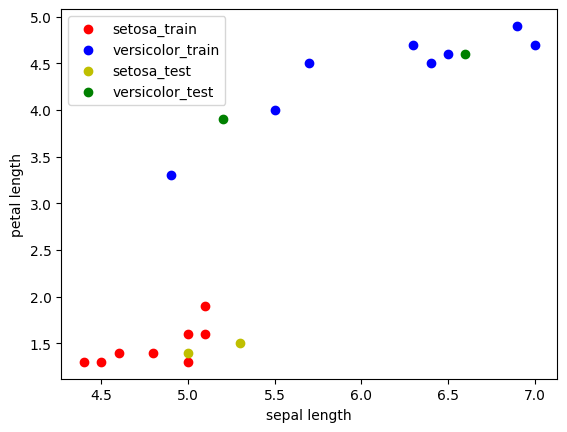

In [5]:
KNN_model = KNN()
KNN_model.train(X_train, Y_train)
y_pred = KNN_model.predict(X_test, k=10)


plt.scatter(X_setosa_train[:, 0], X_setosa_train[:, 2], 
            color='red',marker='o', label='setosa_train')
plt.scatter(X_versicolor_train[:,0], X_versicolor_train[:,2], 
            color='blue',marker='o', label='versicolor_train')
plt.scatter(X_setosa_test[:, 0], X_setosa_test[:, 2], 
            color='y',marker='o', label='setosa_test')
plt.scatter(X_versicolor_test[:,0], X_versicolor_test[:,2], 
            color='g',marker='o', label='versicolor_test')
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc='upper left')
plt.show()